In [1]:
# Портируем все необходимые библиотеки
import os
from matplotlib import rc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [2]:
# Читаем csv файл и меняем запятые на точки
# на всякий случай меняем тип "строка" получившаяся при замене на тип "число"

path=os.path.join(os.getcwd(), "Documents", "lab")
df = pd.read_csv(os.path.join(path, "circbp.csv"), header=0, index_col=None)

df["normMAF"] = df["normMAF"].apply(lambda x: x.replace(',','.'))
df["tumMAF"] = df["tumMAF"].apply(lambda x: x.replace(',','.'))
df["normMAF"] = df["normMAF"].astype("float"); df["tumMAF"] = df["tumMAF"].astype("float")
# df

In [3]:
pd.set_option('display.max_rows', 50)
df.drop_duplicates(subset=['Gene Symbol'], keep="first")
# df

,Gene Symbol,normMAF,tumMAF,criterium
0,CYP2E1,0.69,0.90,g
1,ADH1A,0.74,0.90,g
2,FGA,0.53,0.89,g
3,PZP,0.18,0.88,g
4,PON1,0.60,0.86,g
5,MBL2,0.70,0.86,g
8,C5,0.41,0.84,g
9,BIRC6,0.72,0.84,g
11,CYP2A6,0.80,0.84,g
12,SERPINA11,0.39,0.83,g


/home/emir/miniconda3/envs/lab/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


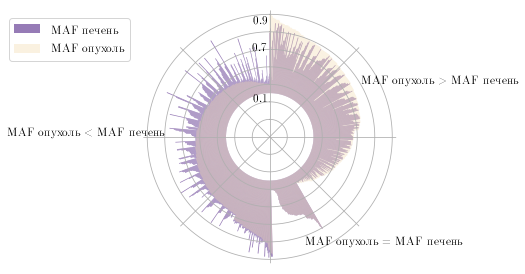

In [8]:
# Задаем параметры так, чтобы питон рисовал барплоты на окржуности
N = len(df["Gene Symbol"])
bottom = 0.5
fs=13

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False) #position
radii_n = df["normMAF"] #height for normal
radii_t = df["tumMAF"] #height for tumor
width = (2*np.pi) / N #base_width

plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', "size":fs})
plt.rc('text.latex', unicode=True)        
plt.rcParams['text.latex.preamble'] = [r'\usepackage[russian,english]{babel}', \
                                       r'\usepackage[T2A]{fontenc}']

ax = plt.subplot(111, polar=True)

bars_n = ax.bar(x=theta, height=radii_n, width=width, 
                bottom=bottom, color="#967bb6", label="MAF печень")
bars_t = ax.bar(x=theta, height=radii_t, width=width, 
                bottom=bottom, color="#f5deb3", alpha=0.4, label="MAF опухоль")

plt.text(np.pi/3, 1.2, "MAF опухоль > MAF печень")
plt.text(3*np.pi/2, 3.0, "MAF опухоль < MAF печень")
plt.text(9*np.pi/10, 1.3, "MAF опухоль = MAF печень")
plt.text(5.86*np.pi/3, 1.3,"0.9")
plt.text(5.8*np.pi/3, 1.0,"0.7")
plt.text(5.56*np.pi/3, 0.43,"0.1")
plt.legend(loc=[-0.53,0.8])

"""Тут просто убираем все ненужные элементы на рисунке"""

ax.spines['polar'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.tight_layout()
plt.savefig(os.path.join(path, "text", "pics", "sun_ru.png"), dpi=300, bbox_inches='tight')